In [1]:
import sys
from pathlib import Path

# Add the path to the utils folder to sys.path
utils_path = Path('../python').resolve()
print(utils_path)
sys.path.append(str(utils_path))

from pathlib import Path
from rasterio.crs import CRS
from crop_utils import (crop_image_by_coordinates, 
                        crop_image_by_geojson_shp, 
                        reproject_geotiff)
from edit_path_utils import (edit_paths)
from rasterio.merge import merge
from rasterio.plot import show
import glob
import rasterio
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from process_utils import (preprocess_data,
                           superpixel_segmentation,
                            tv_denoise, 
                            preprocess_for_merge)
from rio_utils import (reproject_arr_to_match_profile)

/shared/Wildfire/Bety_wildfire_project/Bety_A_S_code/Alpha_Code/wildfire_new/uavsar-main/python


In [2]:
data_dir = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_meter")
tifs = sorted(list(data_dir.glob('./*_VH.tif')))
tifs

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_meter/OPERA_L2_RTC-S1_T064-135519-IW2_20221109T015046Z_20250222T143822Z_S1A_30_v1.0_VH.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_meter/OPERA_L2_RTC-S1_T064-135520-IW1_20221109T015048Z_20250222T143822Z_S1A_30_v1.0_VH.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_meter/OPERA_L2_RTC-S1_T064-135520-IW2_20221109T015049Z_20250222T143822Z_S1A_30_v1.0_VH.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_meter/OPERA_L2_RTC-S1_T064-135521-IW1_20221109T015051Z_20250222T143822Z_S1A_30_v1.0_VH.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_meter/OPERA_L2_RTC-S1_T064-135521-IW2_20221109T015052Z_20250222T143822Z_S1A_30_v1.0_VH.tif')]

In [3]:
target_crs = CRS.from_epsg(4326)   
input_raster_path = tifs[4]
output_raster_path = '/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/OPERA_L2_RTC-S1_T064-135521-IW2_20221109T015052Z_20250222T143822Z_S1A_30_v1.0_VH_degree.tif'

In [4]:
reproject_geotiff(target_crs, input_raster_path, output_raster_path)

Reprojected raster saved to: /shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/OPERA_L2_RTC-S1_T064-135521-IW2_20221109T015052Z_20250222T143822Z_S1A_30_v1.0_VH_degree.tif


In [5]:
shp_dir = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs")
# shps = sorted(list(shp_dir.glob('./*.shp')))
shps = sorted([shp for shp in shp_dir.glob('*.shp') if not shp.name.startswith('._')])
shps

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/bobcat_perimeter_wgs.shp'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/output_shapefile_meters.shp')]

In [6]:
##shps = '../data/bobcat/uavsar_perimeter/bobcat_perimeter_bilinear_inc_south.geojson'
shps = '/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/bobcat_perimeter_wgs.shp'
shps

'/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/bobcat_perimeter_wgs.shp'

In [7]:
data_dir = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree")
tifs = sorted(list(data_dir.rglob('./*_VH_degree.tif')))
tifs 

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/OPERA_L2_RTC-S1_T064-135519-IW2_20221109T015046Z_20250222T143822Z_S1A_30_v1.0_VH_degree.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/OPERA_L2_RTC-S1_T064-135520-IW1_20221109T015048Z_20250222T143822Z_S1A_30_v1.0_VH_degree.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/OPERA_L2_RTC-S1_T064-135520-IW2_20221109T015049Z_20250222T143822Z_S1A_30_v1.0_VH_degree.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/OPERA_L2_RTC-S1_T064-135521-IW1_20221109T015051Z_20250222T143822Z_S1A_30_v1.0_VH_degree.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/OPERA_L2_RTC-S1_T064-135521-IW2_20221109T015052Z_20250222T143822Z_S1A_30_v1.0_VH

In [8]:
path_to_polygon_file = shps
path_to_images = tifs
output_names = [file.stem + '_perimeter_intersection_uavsar.tif' for file in tifs]
output_names

['OPERA_L2_RTC-S1_T064-135519-IW2_20221109T015046Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif',
 'OPERA_L2_RTC-S1_T064-135520-IW1_20221109T015048Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif',
 'OPERA_L2_RTC-S1_T064-135520-IW2_20221109T015049Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif',
 'OPERA_L2_RTC-S1_T064-135521-IW1_20221109T015051Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif',
 'OPERA_L2_RTC-S1_T064-135521-IW2_20221109T015052Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif']

In [9]:
for i in range(len(path_to_images)):
    crop_image_by_geojson_shp(path_to_polygon_file,
                              path_to_images[i], 
                              output_names[i])

OPERA_L2_RTC-S1_T064-135519-IW2_20221109T015046Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.
OPERA_L2_RTC-S1_T064-135520-IW1_20221109T015048Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.
OPERA_L2_RTC-S1_T064-135520-IW2_20221109T015049Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.
OPERA_L2_RTC-S1_T064-135521-IW1_20221109T015051Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.
OPERA_L2_RTC-S1_T064-135521-IW2_20221109T015052Z_20250222T143822Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.


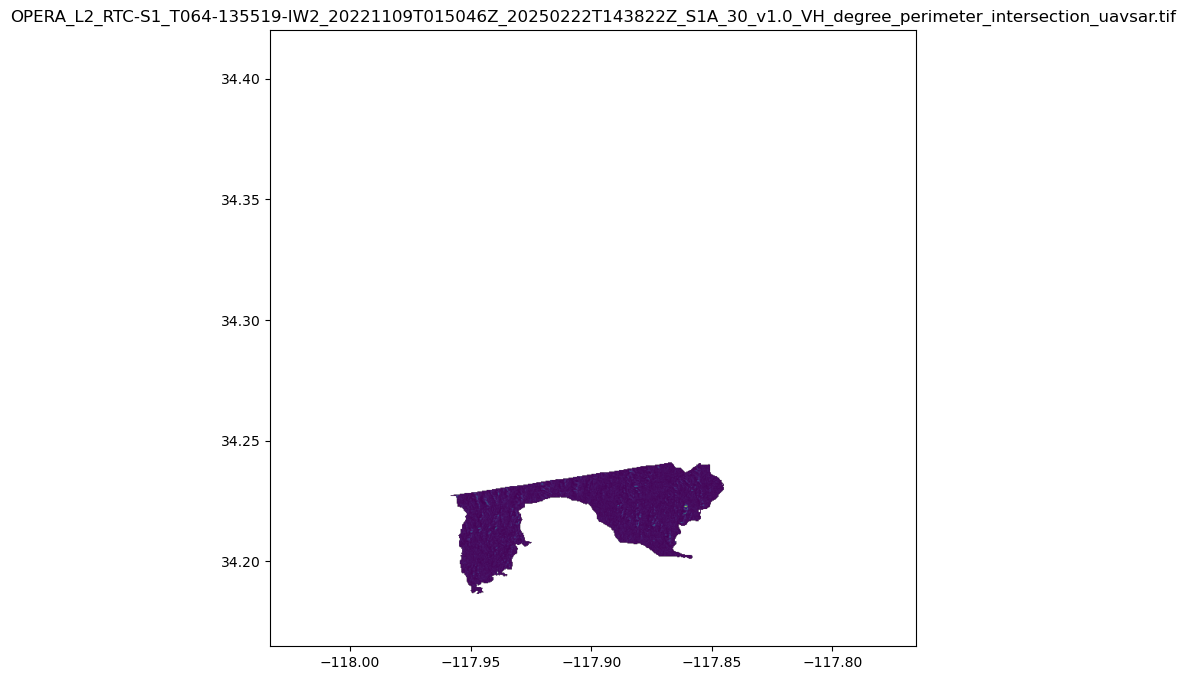

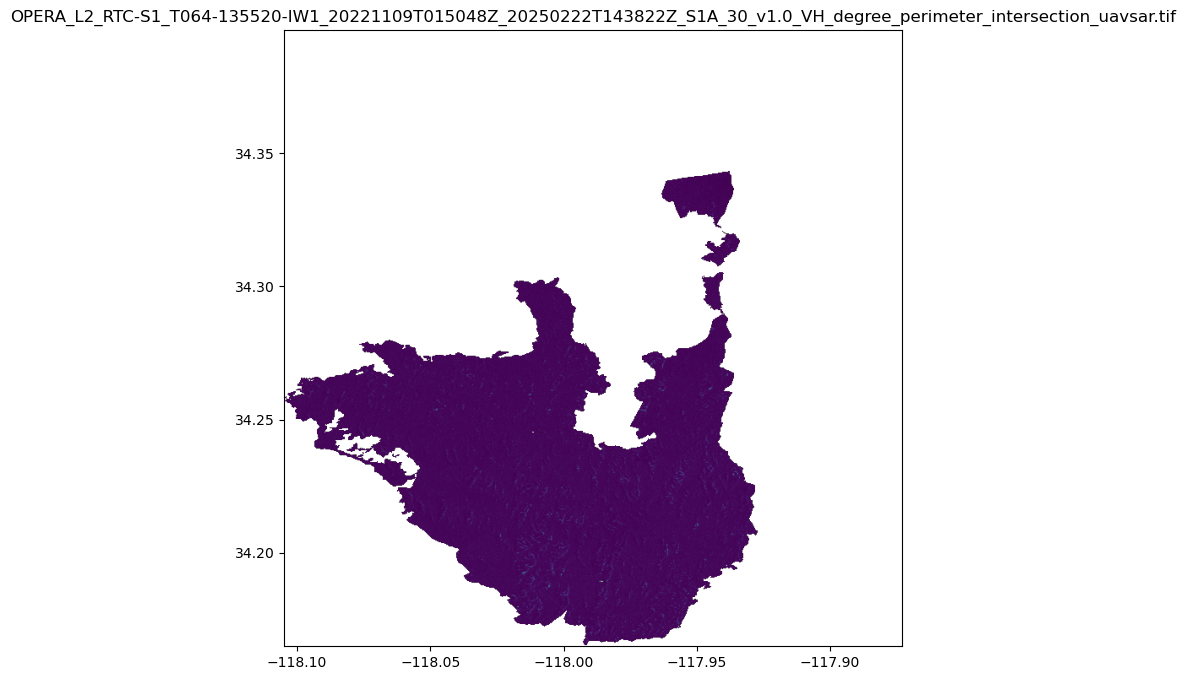

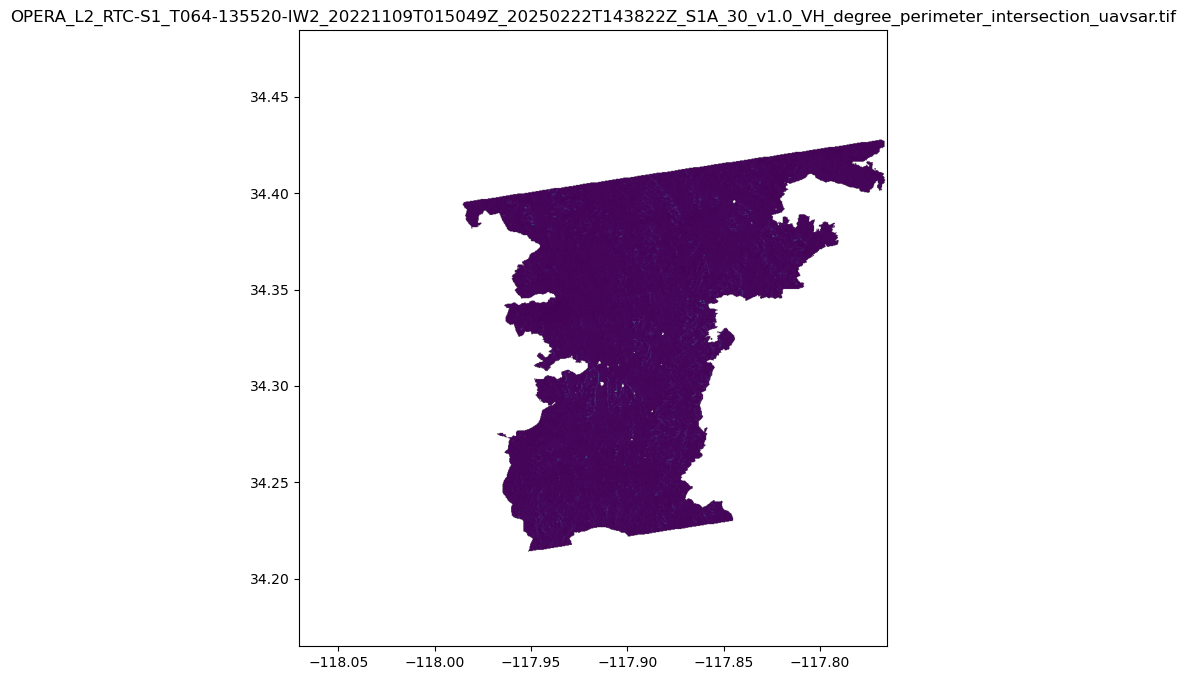

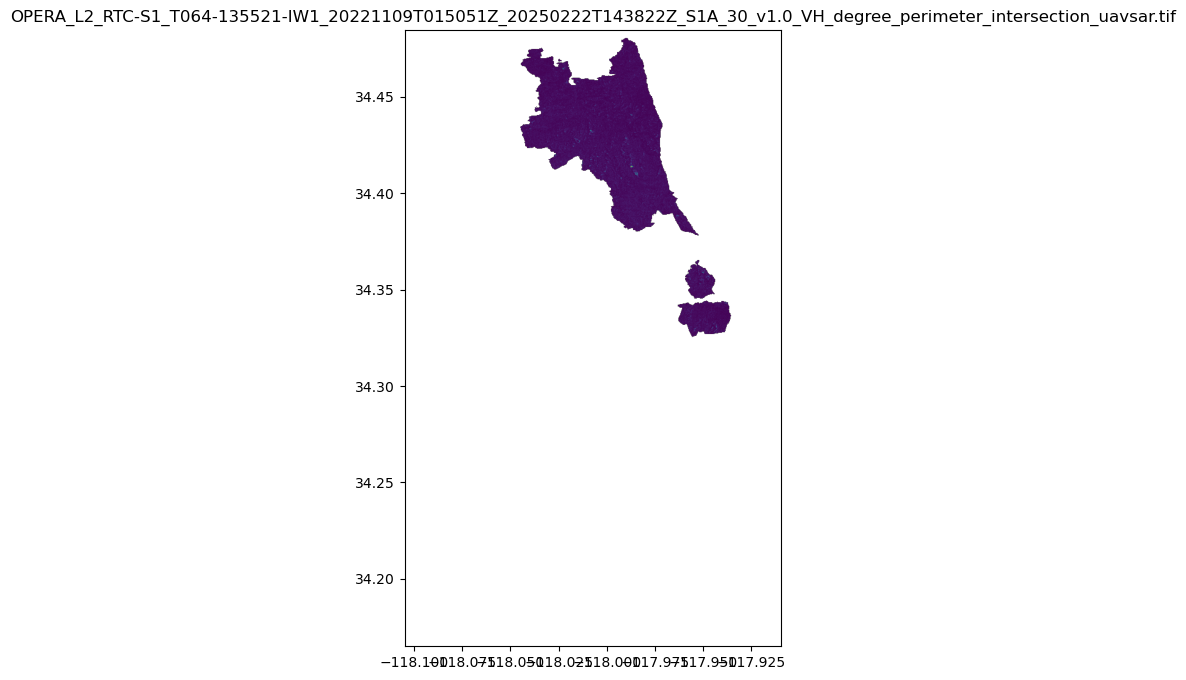

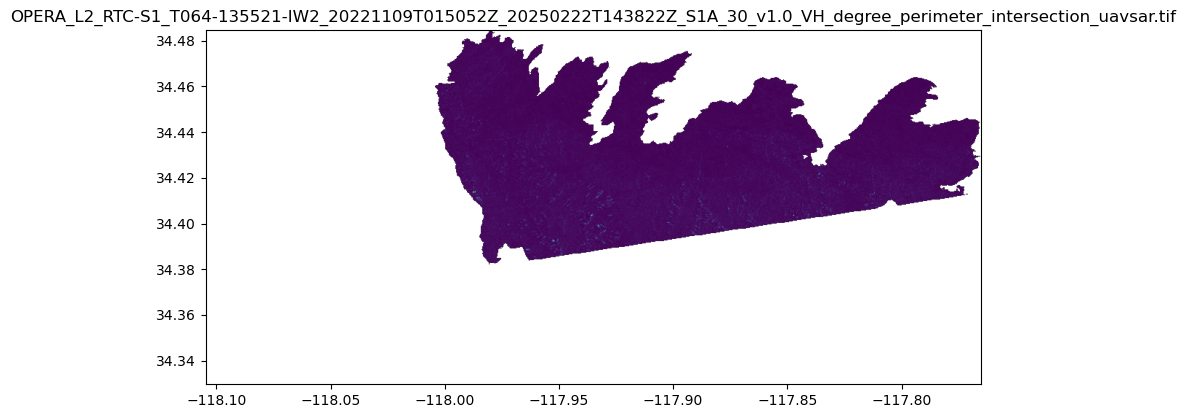

In [10]:


# Loop over outputs and display them
for out_name in output_names:
    with rasterio.open(out_name) as src:
        fig, ax = plt.subplots(figsize=(10, 8))
        show(src, ax=ax)   # or try "viridis", "inferno"
        ax.set_title(out_name)
        plt.show()

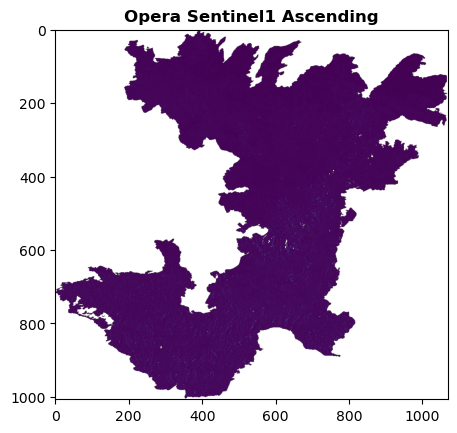

<Axes: title={'center': 'Opera Sentinel1 Ascending'}>

In [40]:


# # Step 1: Get list of all TIFF files

tif_files = output_names

# Step 2: Open all files
src_files = [rasterio.open(fp) for fp in tif_files]

# Step 3: Merge them using rasterio
mosaic, out_trans = merge(src_files)

# Step 4: Use metadata of first file as base
out_meta = src_files[0].meta.copy()

# Step 5: Update metadata for new dimensions and transform
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "count": mosaic.shape[0]
})

# Step 6: Save merged raster
with rasterio.open("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/ascending_merged_image.tif", "w", **out_meta) as dest:
    dest.write(mosaic)

# Optional: show the merged image
show(mosaic[0], title="Opera Sentinel1 Ascending")


In [23]:
data_dir = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_meter")
tifs = sorted(list(data_dir.glob('./*_VH.tif')))
tifs

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_meter/OPERA_L2_RTC-S1_T071-151226-IW2_20221109T135251Z_20250222T152608Z_S1A_30_v1.0_VH.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_meter/OPERA_L2_RTC-S1_T071-151227-IW2_20221109T135253Z_20250222T152557Z_S1A_30_v1.0_VH.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_meter/OPERA_L2_RTC-S1_T071-151228-IW2_20221109T135256Z_20250222T152557Z_S1A_30_v1.0_VH.tif')]

In [24]:
target_crs = CRS.from_epsg(4326)   
input_raster_path = tifs[2]
output_raster_path = '/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree/OPERA_L2_RTC-S1_T071-151228-IW2_20221109T135256Z_20250222T152557Z_S1A_30_v1.0_VH_degree.tif'

In [25]:
reproject_geotiff(target_crs, input_raster_path, output_raster_path)

Reprojected raster saved to: /shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree/OPERA_L2_RTC-S1_T071-151228-IW2_20221109T135256Z_20250222T152557Z_S1A_30_v1.0_VH_degree.tif


In [26]:
shp_dir = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs")
# shps = sorted(list(shp_dir.glob('./*.shp')))
shps = sorted([shp for shp in shp_dir.glob('*.shp') if not shp.name.startswith('._')])
shps

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/bobcat_perimeter_wgs.shp'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/output_shapefile_meters.shp')]

In [27]:
##shps = '../data/bobcat/uavsar_perimeter/bobcat_perimeter_bilinear_inc_south.geojson'
shps = '/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/bobcat_perimeter_wgs.shp'
shps

'/shared/Wildfire/Bety_wildfire_project/Bety_data_test/bobcat_perimeter_wgs/bobcat_perimeter_wgs.shp'

In [28]:
data_dir = Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree")
tifs = sorted(list(data_dir.rglob('./*_VH_degree.tif')))
tifs 

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree/OPERA_L2_RTC-S1_T071-151226-IW2_20221109T135251Z_20250222T152608Z_S1A_30_v1.0_VH_degree.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree/OPERA_L2_RTC-S1_T071-151227-IW2_20221109T135253Z_20250222T152557Z_S1A_30_v1.0_VH_degree.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree/OPERA_L2_RTC-S1_T071-151228-IW2_20221109T135256Z_20250222T152557Z_S1A_30_v1.0_VH_degree.tif')]

In [29]:
path_to_polygon_file = shps
path_to_images = tifs
output_names = [file.stem + '_perimeter_intersection_uavsar.tif' for file in tifs]
output_names

['OPERA_L2_RTC-S1_T071-151226-IW2_20221109T135251Z_20250222T152608Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif',
 'OPERA_L2_RTC-S1_T071-151227-IW2_20221109T135253Z_20250222T152557Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif',
 'OPERA_L2_RTC-S1_T071-151228-IW2_20221109T135256Z_20250222T152557Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif']

In [30]:
for i in range(len(path_to_images)):
    crop_image_by_geojson_shp(path_to_polygon_file,
                              path_to_images[i], 
                              output_names[i])

OPERA_L2_RTC-S1_T071-151226-IW2_20221109T135251Z_20250222T152608Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.
OPERA_L2_RTC-S1_T071-151227-IW2_20221109T135253Z_20250222T152557Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.
OPERA_L2_RTC-S1_T071-151228-IW2_20221109T135256Z_20250222T152557Z_S1A_30_v1.0_VH_degree_perimeter_intersection_uavsar.tif is outputted.


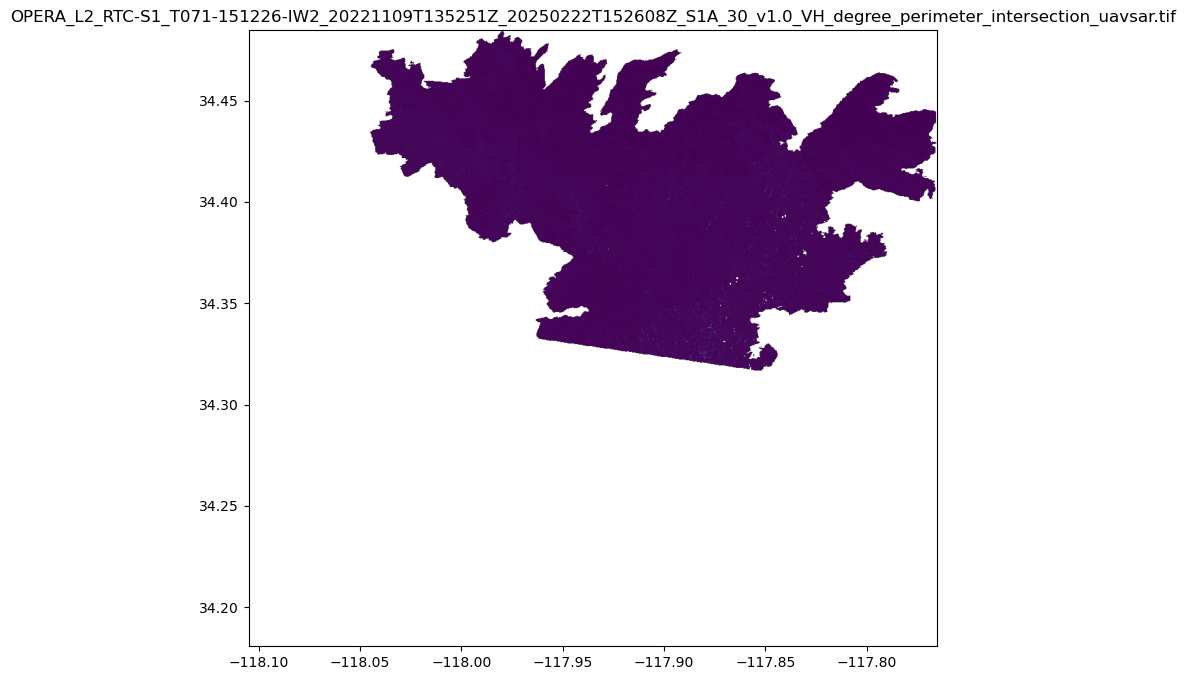

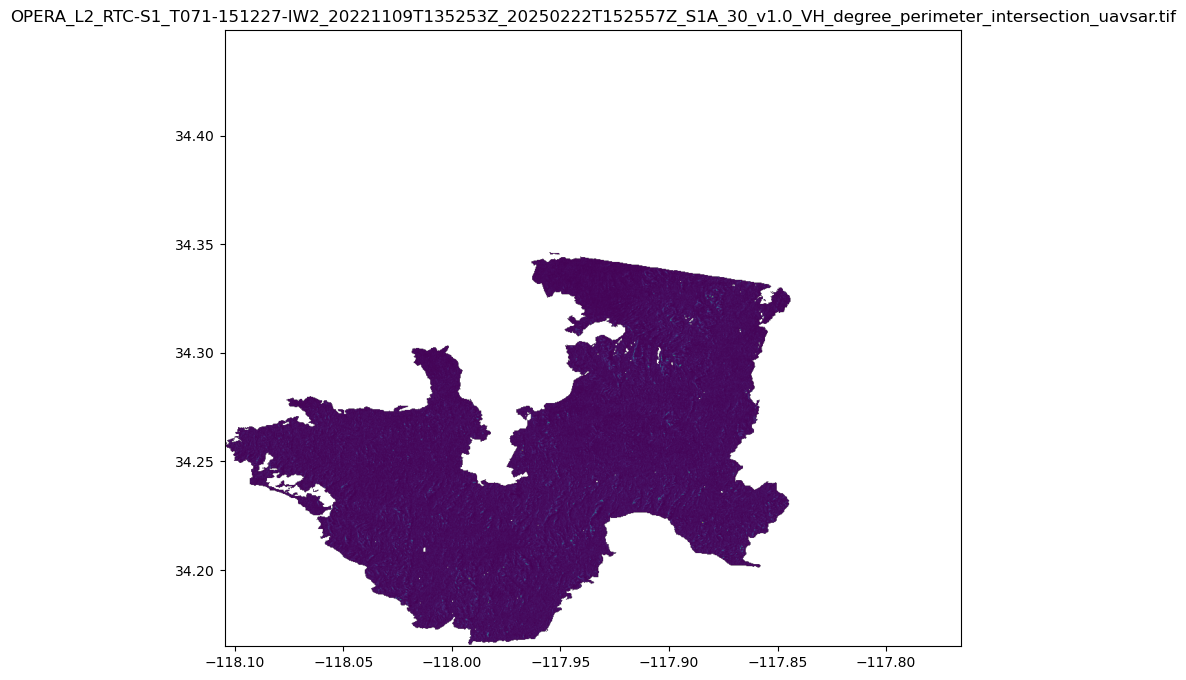

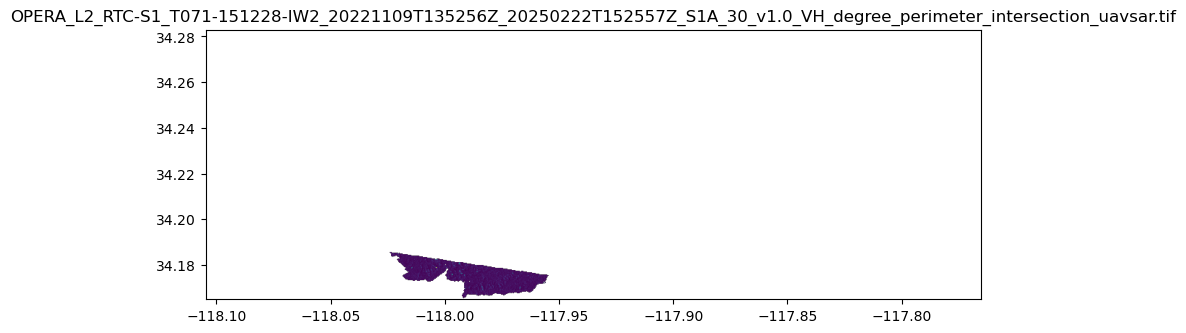

In [31]:
# Loop over outputs and display them
for out_name in output_names:
    with rasterio.open(out_name) as src:
        fig, ax = plt.subplots(figsize=(10, 8))
        show(src, ax=ax)   # or try "viridis", "inferno"
        ax.set_title(out_name)
        plt.show()

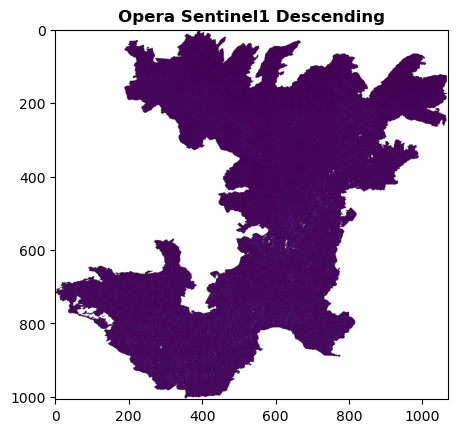

<Axes: title={'center': 'Opera Sentinel1 Descending'}>

In [39]:


# # Step 1: Get list of all TIFF files

tif_files = output_names
# Step 2: Open all files
src_files = [rasterio.open(fp) for fp in tif_files]

# Step 3: Merge them using rasterio
mosaic, out_trans = merge(src_files)

# Step 4: Use metadata of first file as base
out_meta = src_files[0].meta.copy()

# Step 5: Update metadata for new dimensions and transform
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "count": mosaic.shape[0]
})

# Step 6: Save merged raster
with rasterio.open("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree/descending_merged_image.tif", "w", **out_meta) as dest:
    dest.write(mosaic)

# Optional: show the merged image
# Show only the top layer (first band)
show(mosaic[0], title="Opera Sentinel1 Descending")


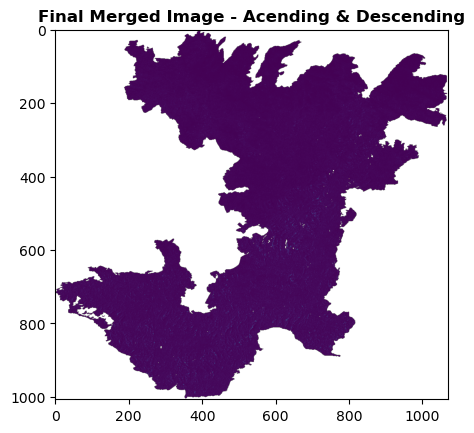

<Axes: title={'center': 'Final Merged Image - Acending & Descending'}>

In [52]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show

# Input file paths
tif_files = [
    "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_descending_degree/descending_merged_image.tif",
    "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Opera_sentinel1_rtc_data_ascending_degree/ascending_merged_image.tif"
]

# Open both files
src_files = [rasterio.open(fp) for fp in tif_files]

# Merge them
mosaic, out_trans = merge(src_files)

# Use metadata from first file as base
out_meta = src_files[0].meta.copy()

# Update metadata for final merged raster
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "count": mosaic.shape[0]
})

# Save the final merged file
output_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/final_merged_image.tif"
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(mosaic)

# Optional: Show the merged raster
show(mosaic[0], title="Final Merged Image - Acending & Descending")


/tmp/ipykernel_151247/3644415056.py:10: RuntimeWarning: Mean of empty slice
  return np.nanmean(values)


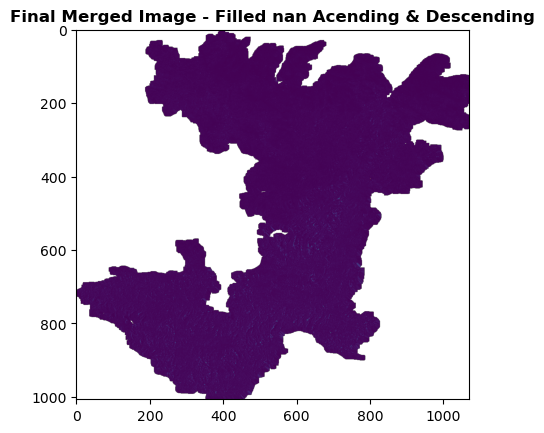

<Axes: title={'center': 'Final Merged Image - Filled nan Acending & Descending'}>

In [53]:
import numpy as np
from scipy.ndimage import generic_filter

# ---- Fill NaN functions ----
def fill_nan_with_local_mean(arr, size=2):
    """
    Fill NaNs in a 2D array with the local mean using a square kernel.
    """
    def nanmean_filter(values):
        return np.nanmean(values)

    # Create a mask for NaNs
    nan_mask = np.isnan(arr)

    # Apply local mean filter
    filled = generic_filter(arr, nanmean_filter, size=size, mode='nearest')

    # Replace only NaNs with the local mean
    arr[nan_mask] = filled[nan_mask]
    return arr


def iterative_fill_nan(arr, size=2, max_iter=10):
    arr = arr.copy()
    for i in range(max_iter):
        nan_count_before = np.isnan(arr).sum()
        arr = fill_nan_with_local_mean(arr, size=size)
        nan_count_after = np.isnan(arr).sum()
        if nan_count_after >= nan_count_before:
            break
    return arr


# ---- Apply to merged raster ----
# mosaic.shape = (bands, height, width)
filled_mosaic = np.empty_like(mosaic)

for i in range(mosaic.shape[0]):  # iterate through bands
    filled_mosaic[i] = iterative_fill_nan(mosaic[i], size=2)

# Save the filled raster
output_filled_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/final_merged_filled_image.tif"
out_meta.update({"count": filled_mosaic.shape[0]})

with rasterio.open(output_filled_path, "w", **out_meta) as dest:
    dest.write(filled_mosaic)

# Optional: show top layer after filling
show(filled_mosaic[0], title="Final Merged Image - Filled nan Acending & Descending")


In [ ]:
# from shapely.geometry import Polygon

# # Sentinel polygon coordinates
# sentinel_coords = [  (-112.6712251470241, 42.66619006067943),
#     (-112.621756049386, 42.67230922282789),
#     (-112.5676374090669, 42.6789709159011),
#     (-112.5117474524398, 42.68581973527101),
#     (-112.4555736403983, 42.69267367567785),
#     (-112.4022247853427, 42.69915929314778),
#     (-112.3476918517171, 42.70575994896551),
#     (-112.2969698355217, 42.71187948950796),
#     (-112.2442936016725, 42.71820678434054),
#     (-112.1951024862568, 42.72409694860813),
#     (-112.1354840190657, 42.73119036863334),
#     (-112.0834728865746, 42.737360897983),
#     (-112.035221058058, 42.74306825601197),
#     (-111.983580739583, 42.7491474371541),
#     (-111.9343345043488, 42.75492517364447),
#     (-111.8828313367731, 42.76094033640411),
#     (-111.8317430436628, 42.76688338666531),
#     (-111.7785769215591, 42.7730395074192),
#     (-111.726971558683, 42.77899206519194),
#     (-111.6764379567649, 42.78479868799305),
#     (-111.626600094036, 42.79050306255412),
#     (-111.6663432582028, 42.97735796652439),
#     (-111.7167091444307, 42.97161699376262),
#     (-111.7674369491217, 42.96581137985208),
#     (-111.817295723396, 42.96008077171322),
#     (-111.8683324493332, 42.95419271720381),
#     (-111.9209583438916, 42.94809838459572),
#     (-111.9723719309251, 42.94211798299086),
#     (-112.0239381528598, 42.93609545800555),
#     (-112.0717717900882, 42.93048157159581),
#     (-112.1237349030691, 42.92436532063014),
#     (-112.1807118450755, 42.91763705298646),
#     (-112.2337890499791, 42.91133735085489),
#     (-112.2864149919961, 42.90506465531799),
#     (-112.3404493751371, 42.89859929605408),
#     (-112.3935234839243, 42.89222116335693),
#     (-112.4498760835395, 42.88542475826335),
#     (-112.502277417963, 42.8790734305505),
#     (-112.5560660523742, 42.87252925453712),
#     (-112.6120529809349, 42.8656918869624),
#     (-112.6666506832061, 42.8589943219602),
#     (-112.7212115957221, 42.8522734796712),
#     (-112.6712251470241, 42.66619006067943)  # closing point
# ]

# sentinel_poly = Polygon(sentinel_coords)

# # Use sentinel_poly in place of bobcat polygon


In [ ]:
# from shapely.geometry import Polygon

# # Define polygon vertices (longitude, latitude)
# # Example: a square-like shape for demonstration
# vertices =  [
#   [-110.0716504400177, 43.30820408880859],
#   [-110.1286604064854, 43.3151562815608],
#   [-110.1812645779681, 43.32154943054715],
#   [-110.2346481695043, 43.32800993867559],
#   [-110.2867840850707, 43.33429546480443],
#   [-110.3408857779139, 43.34078859856216],
#   [-110.3902524007223, 43.34669564300985],
#   [-110.4417388995915, 43.35282932716381],
#   [-110.4880229564935, 43.35832910942048],
#   [-110.5415792698206, 43.36465736328658],
#   [-110.5924770110611, 43.37065027507833],
#   [-110.6399114774788, 43.3762184365648],
#   [-110.6904493897052, 43.38212337411255],
#   [-110.7362545291774, 43.38746149897649],
#   [-110.785929069168, 43.39322259773338],
#   [-110.8359559669166, 43.39900094254295],
#   [-110.8868838293144, 43.40485832113399],
#   [-110.9365555552921, 43.41054977233367],
#   [-110.9889790506994, 43.41652777768918],
#   [-111.0402249868125, 43.42234856959342],
#   [-111.0888949896799, 43.42785712697709],
#   [-111.1163160971887, 43.26171998154355],
#   [-111.0736534483865, 43.25686325309271],
#   [-111.0241020853299, 43.25121205505597],
#   [-110.9747521946151, 43.24556096857255],
#   [-110.9237037176939, 43.23969403170189],
#   [-110.8740040229116, 43.23395710526861],
#   [-110.8226734805956, 43.22801022191745],
#   [-110.7769217604674, 43.22268138791413],
#   [-110.7267074284444, 43.2168173744639],
#   [-110.6767820501382, 43.21096352444442],
#   [-110.6261954907321, 43.20500941568222],
#   [-110.575275327835, 43.19899256963223],
#   [-110.5213792551822, 43.19260187355806],
#   [-110.4701736545107, 43.18650167975828],
#   [-110.4173693027414, 43.18018769329493],
#   [-110.3657321215342, 43.17398668048418],
#   [-110.3159374871145, 43.16798095598834],
#   [-110.2658725030015, 43.16191981127914],
#   [-110.2135999981966, 43.15556948232229],
#   [-110.1609997775809, 43.14915400067155],
#   [-110.1077499885561, 43.14263391528357],
#   [-110.0716504400177, 43.30820408880859]
# ]

# # Create a Polygon object
# polygon = Polygon(vertices)

# # Calculate the centroid
# centroid_point = polygon.centroid

# # Extract centroid coordinates
# centroid_lon = centroid_point.x
# centroid_lat = centroid_point.y

# print(f"Centroid Longitude: {centroid_lon}")
# print(f"Centroid Latitude: {centroid_lat}")